We put each track in ER, FXHedge in USD

In [1]:
import pandas as pd
import numpy as np
from tools import make_track, make_ER, make_FXHedge

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
risk_premia = pd.read_csv("financial_data/bnp_risk_premia_data.csv", index_col=0, parse_dates=True, dayfirst=True).ffill()

In [3]:
GBP_USD_fx = pd.read_csv(r"financial_data/FX_rates.csv", index_col=0, parse_dates=True, dayfirst=True)['GBP/USD']
JPY_USD_fx = pd.read_csv(r"financial_data/FX_rates.csv", index_col=0, parse_dates=True, dayfirst=True)['JPY/USD']
EUR_USD_fx = pd.read_csv(r"financial_data/FX_rates.csv", index_col=0, parse_dates=True, dayfirst=True)['EUR/USD']

In [4]:
AIR_TR_GBP = risk_premia[["BNPIAIRG"]]
AIR_TR_JPY = risk_premia[["BNPIAIRJ"]]
AIR_TR_EUR = risk_premia[["BNPIAIRE"]]

GBP_rate = pd.read_csv(r"financial_data/GBP_rates.csv", index_col=0, parse_dates=True, dayfirst=True)['3M']
EUR_rate = pd.read_csv(r"financial_data/EUR_rates.csv", index_col=0, parse_dates=True, dayfirst=True)['3M']
JPY_rate = pd.read_csv(r"financial_data/JPY_rates.csv", index_col=0, parse_dates=True, dayfirst=True)['3M']

AIR_ER_GBP = make_ER(AIR_TR_GBP, GBP_rate)
AIR_ER_JPY = make_ER(AIR_TR_JPY, JPY_rate)
AIR_ER_EUR = make_ER(AIR_TR_EUR, EUR_rate)

AIR_ER_GBP_FX = make_FXHedge(AIR_TR_GBP, GBP_USD_fx)
AIR_ER_JPY_FX = make_FXHedge(AIR_TR_JPY, JPY_USD_fx)
AIR_ER_EUR_FX = make_FXHedge(AIR_TR_EUR, EUR_USD_fx)

In [5]:
risk_premia_fx = make_FXHedge(risk_premia,EUR_USD_fx)
risk_premia_fx["BNPIAIRG"] = AIR_ER_GBP_FX
risk_premia_fx["BNPIAIRJ"] = AIR_ER_JPY_FX
risk_premia_fx["BNPIAIRE"] = AIR_ER_EUR_FX

In [6]:
risk_premia_fx.to_pickle("financial_data/risk_premia_ER_FX_USD.pkl")

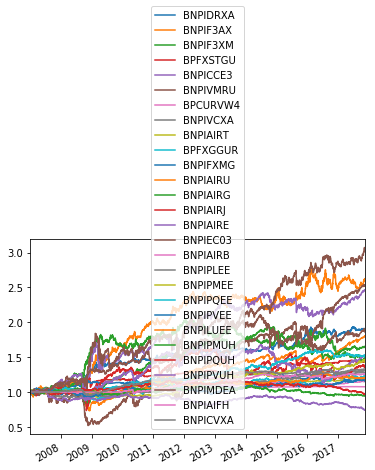

In [40]:
risk_premia_fx.plot()

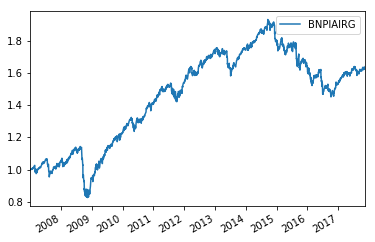

In [23]:
AIR_ER_GBP.plot()

In [7]:
df =pd.DataFrame([2.3,3.9,3.2,-1,np.nan,9.8,-0.2,np.nan,18])
df

,0
0,2.3
1,3.9
2,3.2
3,-1.0
4,NaN
5,9.8
6,-0.2
7,NaN
8,18.0


In [8]:
df.std()

0    6.666798
dtype: float64

In [9]:
df.std(skipna=False)

0   NaN
dtype: float64